<a href="https://colab.research.google.com/github/jithesh9539/Deep_Learning_Assignment1/blob/main/Blackbox_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow-gpu

In [5]:
!nvidia-smi

Mon Feb  7 19:48:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [8]:
from fastai.vision.all import *


In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path='/content/gdrive/MyDrive/Datasets/images'



In [16]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 2s 0us/step


In [17]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.175076,0.020463,0.007442,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.049215,0.031315,0.008119,00:56


In [23]:
uploader = SimpleNamespace(data = ['/content/Abyssinian_5.jpg'])

In [24]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [26]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.777040,2.446686,00:02


epoch,train_loss,valid_loss,time
0,1.884631,1.459181,00:02
1,1.621715,1.219205,00:02
2,1.440018,0.965846,00:02
3,1.306832,1.169333,00:02
4,1.221657,0.871075,00:02
5,1.119675,0.821324,00:02
6,1.030358,0.782231,00:02
7,0.957273,0.765976,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


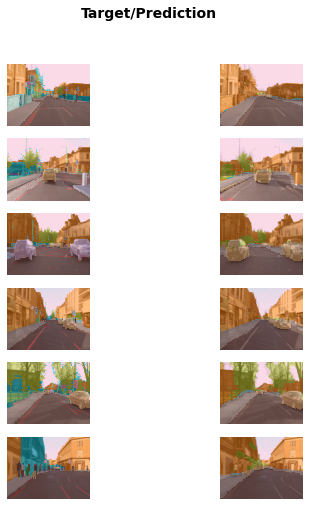

In [27]:
learn.show_results(max_n=6, figsize=(7,8))

In [28]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.473937,0.400322,0.821760,03:36


epoch,train_loss,valid_loss,accuracy,time
0,0.302237,0.238107,0.905040,07:13
1,0.248942,0.241768,0.902200,07:13
2,0.185482,0.191927,0.929120,07:14
3,0.150871,0.189217,0.929520,07:14


In [29]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([3.3903e-04, 9.9966e-01]))

In [30]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.469899,0.393792,0.822760,03:36


epoch,train_loss,valid_loss,accuracy,time
0,0.311549,0.296833,0.880320,07:15
1,0.249771,0.230045,0.911720,07:14
2,0.188909,0.189096,0.928040,07:15
3,0.138657,0.191958,0.930320,07:15


In [31]:
doc(learn.predict)

In [32]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [33]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386991,0.388698,0.817875,00:07
1,0.362179,0.360333,0.830160,00:04
2,0.348319,0.353973,0.833999,00:04


In [35]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521985,1.366753,00:02


epoch,train_loss,valid_loss,time
0,1.379865,1.304656,00:02
1,1.285757,1.114312,00:01
2,1.030688,0.816805,00:01
3,0.806604,0.688206,00:01
4,0.702477,0.659664,00:01
5,0.659867,0.652258,00:01
6,0.645855,0.648555,00:00
7,0.630398,0.646455,00:00
8,0.623651,0.646068,00:00
9,0.615209,0.645975,00:00


In [36]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,100.0,78.0,3.0,3.131013
1,46.0,95.0,3.0,3.047804
2,41.0,24.0,4.0,3.509111
3,39.0,65.0,3.0,3.760557
4,54.0,65.0,4.5,3.596454
5,72.0,35.0,3.0,3.267768
6,35.0,81.0,4.0,2.973591
7,86.0,34.0,2.5,3.600284
8,10.0,77.0,5.0,4.268673
